## - To compare multiple files

In [1]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

ProblemDir = '/Users/ranchu/ToDownload/VX_G15+100ms/Frozen_KS/'
nEIndex1 = '32E'
nEIndex2 = '40E'

filenamebase = '/deleptonizationwave_hdf5_chk_'
ClosureIndex = [nEIndex1,nEIndex2,nEIndex1,nEIndex2]
FileIndex    = [0,0,500,500]
Emin = [1.0,3.0,1.0,3.0]
Emax = [300.0,300.0,300.0,300.0]
ZoomE = [1.0947611698537183,1.0748700581781865, 1.0947611698537183, 1.0748700581781865]

if( len(ClosureIndex) != len(FileIndex) ):
    print('Closure Index and File Index disagree.')
fnum = len(FileIndex)
AverageEnergy = fnum * ['?']
AverageFluxFactor = fnum * ['?']
Luminosity = fnum * ['?']
NumberDensity = fnum * ['?']
EnergyDensity = fnum * ['?']
J = fnum * ['?']
H1 = fnum * ['?']
ECenter_J = fnum * ['?']
ECenter_H = fnum * ['?']

for i in range(fnum):
    closure = ClosureIndex[i]
    fileindex = FileIndex[i]
    directory  = ProblemDir + closure    
    # ---
    fullfilename = directory + filenamebase + '{:04d}'.format(fileindex)
    print(fullfilename)
    
    [NumberDensity[i], EnergyDensity[i], AverageEnergy[i], J[i], ECenter_J[i], Radius] \
    = fycal.ReadMoment_Zeroth(fullfilename,Emin[i],Emax[i],ZoomE[i])
    [Luminosity[i], H1[i], ECenter_H[i], Radius] \
    = fycal.ReadMoment_First(fullfilename,Emin[i],Emax[i],ZoomE[i])
    AverageFluxFactor[i] \
    = np.true_divide(Luminosity[i],EnergyDensity[i])


/Users/ranchu/ToDownload/VX_G15+100ms/Frozen_KS/32E/deleptonizationwave_hdf5_chk_0000
/Users/ranchu/ToDownload/VX_G15+100ms/Frozen_KS/40E/deleptonizationwave_hdf5_chk_0000
/Users/ranchu/ToDownload/VX_G15+100ms/Frozen_KS/32E/deleptonizationwave_hdf5_chk_0500
/Users/ranchu/ToDownload/VX_G15+100ms/Frozen_KS/40E/deleptonizationwave_hdf5_chk_0500


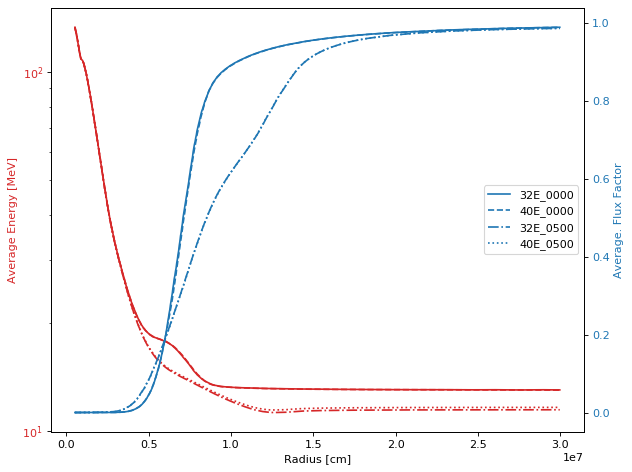

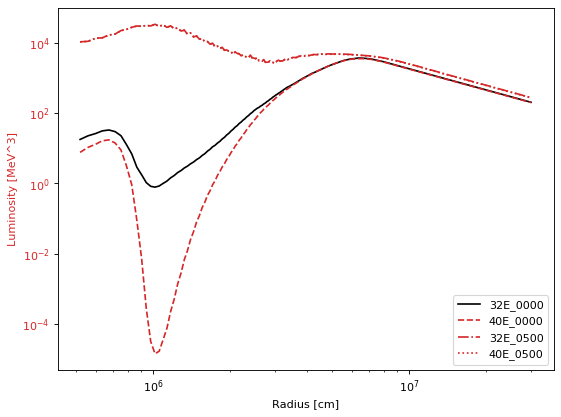

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

LineType     = ['solid','dashed','dashdot','dotted','dotted']
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]',color=color)
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = ClosureIndex[i]
    lns[i] = ax1.plot(Radius,AverageEnergy[i],linestyle=LineType[i],color=color,label=leg)

ax1.set_yscale('log')
ax1.set_xscale('linear') 
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average. Flux Factor', color=color)
for i in range(fnum):
    leg =  ClosureIndex[i]+ '_{:04d}'.format(FileIndex[i])
    lns[i+fnum] = ax2.plot(Radius, AverageFluxFactor[i],linestyle=LineType[i], color=color,label=leg)

ax2.set_yscale('linear')
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper right')
ax2.legend(loc='right')

plt.show()


fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Luminosity ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Luminosity [MeV^3]',color=color)
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = ClosureIndex[i]+'_{:04d}'.format(FileIndex[i])#'Ave. Energy ' + ClosureIndex[i] + '{:04d}'.format(FileIndex[i])
    if(i == 0):
        lns[i] = ax1.plot(Radius,Luminosity[i],linestyle=LineType[i],color='black',label=leg)
    else:
        lns[i] = ax1.plot(Radius,Luminosity[i],linestyle=LineType[i],color=color,label=leg)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='best')

plt.show()

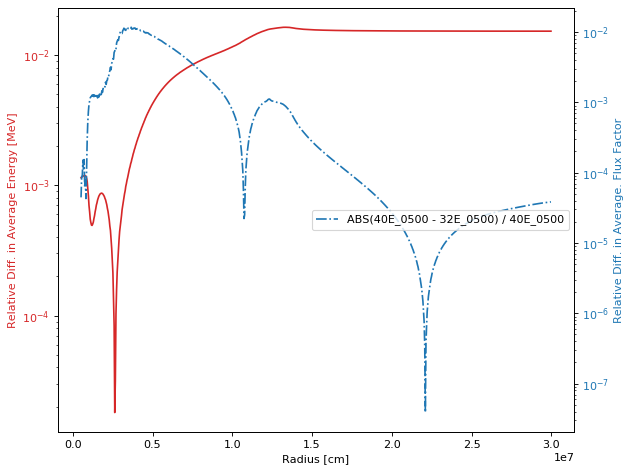

In [15]:
%matplotlib inline

base_i = 3
comp_i = 2

RelativeDiff_AverageEnergy= abs(AverageEnergy[base_i]-AverageEnergy[comp_i])/AverageEnergy[base_i]
RelativeDiff_AverageFluxFactor= abs(AverageFluxFactor[base_i]-AverageFluxFactor[comp_i])/abs(AverageFluxFactor[base_i])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
lns = 2*fnum *['?']
leg = 'ABS('+ ClosureIndex[base_i]+'_{:04d}'.format(FileIndex[base_i])+' - '+ ClosureIndex[comp_i]+'_{:04d}'.format(FileIndex[comp_i])
leg = leg + ') / ' + ClosureIndex[base_i]+'_{:04d}'.format(FileIndex[base_i])
lns[0] = ax1.plot(Radius,RelativeDiff_AverageEnergy,linestyle=LineType[0],color=color,label=leg)

ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
lns[1] = ax2.plot(Radius, RelativeDiff_AverageFluxFactor,linestyle=LineType[1], color=color,label=leg)

ax2.set_yscale('log')    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
ax2.legend(loc='right')

plt.show()